# 统计分析
<hr>

## 线性回归
<hr>

使用 Python 做线性回归分析有好几种方式，常见的是用`statsmodels`库或者`sklearn`库。

假设有下面的数据存储在 excel 文件 line_regression.xlsx 中：

| 不良贷款  | 各项贷款余额 | 本年累计应收贷款 | 贷款项目个数 | 本年固定资产投资额 |
|-------|--------|----------|--------|-----------|
| 0\.9  | 67\.3  | 6\.8     | 5      | 51\.9     |
| 1\.1  | 111\.3 | 19\.8    | 16     | 90\.9     |
| 4\.8  | 173\.0 | 7\.7     | 17     | 73\.7     |
| 3\.2  | 80\.8  | 7\.2     | 10     | 14\.5     |
| 7\.8  | 199\.7 | 16\.5    | 19     | 63\.2     |
| 2\.7  | 16\.2  | 2\.2     | 1      | 2\.2      |
| 1\.6  | 107\.4 | 10\.7    | 17     | 20\.2     |
| 12\.5 | 185\.4 | 27\.1    | 18     | 43\.8     |
| 1\.0  | 96\.1  | 1\.7     | 10     | 55\.9     |
| 2\.6  | 72\.8  | 9\.1     | 14     | 64\.3     |
| 0\.3  | 64\.2  | 2\.1     | 11     | 42\.7     |
| 4\.0  | 132\.2 | 11\.2    | 23     | 76\.7     |
| 0\.8  | 58\.6  | 6\.0     | 14     | 22\.8     |
| 3\.5  | 174\.6 | 12\.7    | 26     | 117\.1    |
| 10\.2 | 263\.5 | 15\.6    | 34     | 146\.7    |
| 3\.0  | 79\.3  | 8\.9     | 15     | 29\.9     |
| 0\.2  | 14\.8  | 0\.6     | 2      | 42\.1     |
| 0\.4  | 73\.5  | 5\.9     | 11     | 25\.3     |
| 1\.0  | 24\.7  | 5\.0     | 4      | 13\.4     |
| 6\.8  | 139\.4 | 7\.2     | 28     | 64\.3     |
| 11\.6 | 368\.2 | 16\.8    | 32     | 163\.9    |
| 1\.6  | 95\.7  | 3\.8     | 10     | 44\.5     |
| 1\.2  | 109\.6 | 10\.3    | 14     | 67\.9     |
| 7\.2  | 196\.2 | 15\.8    | 16     | 39\.7     |
| 3\.2  | 102\.2 | 12\.0    | 10     | 97\.1     |

首先使用 pandas 读取 excel 数据：

In [1]:
import pandas as pd

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
# 读取 excel 数据，引号里面是 excel 文件在电脑的存储位置
datas = pd.read_excel("datas/linear_regression.xlsx")

```{admonition} 注意
- 苹果电脑的文件地址用符号``/``分割，而 windows 系统的文件地址用符号``\``分割
- 文件地址前加上``r``能够保持字符串原始值的含义，而不对其中的符号进行转义
```

In [2]:
datas.head()

,不良贷款,各项贷款余额,本年累计应收贷款,贷款项目个数,本年固定资产投资额
0,0.9,67.3,6.8,5,51.9
1,1.1,111.3,19.8,16,90.9
2,4.8,173.0,7.7,17,73.7
3,3.2,80.8,7.2,10,14.5
4,7.8,199.7,16.5,19,63.2


### `statsmodels` 库
<hr>

使用`statsmodels` 库做回归一般有以下几个步骤：

- 通过 OLS 函数构建回归模型
- 通过 fit 函数拟合
- 通过summary 函数输出回归结果
- 通过 predict 函数得出回归的预测值

``OLS`` 函数的基本用法如下：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">OLS(endog, exog=None, missing='none',**kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">endog</td>
        <td style="text-align:left">因变量（内生变量），是一个一维的数组</td>
    </tr>
    <tr>
        <td style="text-align:left">exog</td>
        <td style="text-align:left">自变量（外生变量），是一个一维或多维数组</td>
    </tr>
    <tr>
        <td style="text-align:left">missing</td>
        <td style="text-align:left">出现空值时的处理方式，可选设置为 'drop'（丢掉空值）, 'raise'（提醒错误）</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">其他设置</td>
    </tr>
</table>
<br />

函数 OLS 默认回归模型没有截距。若模型中有截距，必须对自变量数据使用一个`addconstant()`函数。

完整代码如下：

                            OLS Regression Results                            
Dep. Variable:                   不良贷款   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     56.75
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           1.18e-07
Time:                        15:57:33   Log-Likelihood:                -51.508
No. Observations:                  25   AIC:                             107.0
Df Residuals:                      23   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8295      0.723     -1.147      0.2

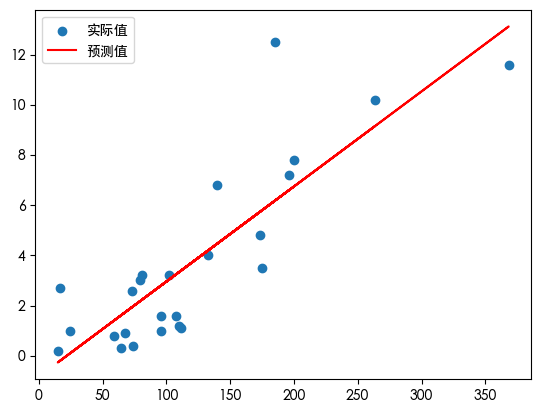

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
datas = pd.read_excel("datas/linear_regression.xlsx")  # 读取 excel 数据，引号里面是 excel 文件的位置
y = datas.iloc[:, 0]  # 因变量为第 1列数据
x = datas.iloc[:, 1]  # 自变量为第 2 列数据
x = sm.add_constant(x)  # 若模型中有截距，必须有这一步
model = sm.OLS(y, x, hasconst=1)  # 构建最小二乘模型并拟合
results = model.fit()
print(results.summary())  # 输出回归结果

# 画图
# 下面几行代码使得 pyplot 画出的图形中可以显示中文
# mac 系统下字体: 黑体 'Heiti TC'，宋体：'Songti SC'; win 系统下黑体: 'SimHei'
# binder 下字体：'Noto Sans CJK JP'
import platform

os_name = platform.system()
if os_name == "Windows":
    font = "SimHei"
elif os_name == "Darwin":
    font = "Heiti TC"
else:
    font = "Noto Sans CJK JP"
plt.rcParams["font.sans-serif"] = [font]

predicts = results.predict()  # 模型的预测值
x = datas.iloc[:, 1]  # 自变量为第 3 列数据
plt.scatter(x, y, label="实际值")  # 散点图
plt.plot(x, predicts, color="red", label="预测值")
plt.legend()  # 显示图例，即每条线对应 label 中的内容
plt.show()  # 显示图形

`````{admonition} tips
:class: tip
- 若导入包时使用命令 import statsmodels.formula.api as sm, 则在回归分析时不用函数 add_constant 添加截距，但是必须使用统计语言给出模型信息。
`````

使用统计语言公式的代码：

```{code-block} python
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

datas = pd.read_excel('datas\linear_regression.xlsx')  # 读取 excel 数据，引号里面是 excel 文件的位置
result = sm.ols('不良贷款~各项贷款余额', datas).fit() # 构建最小二乘模型并拟合，
                               #此时不用单独输入 x，y了，而是将自变量与因变量用统计语言公式表示，将全部数据导入
<hr>
print(result.summary()) # 输出回归结果

```

在多元回归中，只需把自变量改为多列数据即可，假如不良贷款为因变量，从第2列到第5列都是因变量，则使用 statsmodels 包的全部 python 代码如下：

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
datas = pd.read_excel("datas/linear_regression.xlsx")  # 读取 excel 数据，引号里面是 excel 文件的位置
y = datas.iloc[:, 1]  # 因变量为第 2 列数据
x = datas.iloc[:, 2:6]  # 自变量为第 3 列到第 6 列数据
x = sm.add_constant(x)  # 若模型中有截距，必须有这一步
result = sm.OLS(y, x).fit()  # 构建最小二乘模型并拟合
print(result.summary())  # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:                 各项贷款余额   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     30.32
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           8.05e-08
Time:                        15:57:33   Log-Likelihood:                -123.70
No. Observations:                  25   AIC:                             255.4
Df Residuals:                      21   BIC:                             260.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.0689     16.072     -0.875      0.3

### sklearn 库
<hr>

sklearn 包是机器学习中常见的 python 包，做统计分析时，它并不能像 statsmodels 那样生成非常详细的统计分析结果。**默认自变量与因变量数据都是二维数据，自变量或因变量需要增加一个轴**。

使用`sklearn` 库做回归一把有以下几个步骤：

- 对自变量或因变量增加轴
- 通过 LinearRegression 函数构建回归模型
- 通过 fit 函数拟合
- 通过 predict 函数得出回归的预测值
- 通过 coef_，intercept_，score 等函数输出统计结果

对于上面同样的例子，一元回归的代码：

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
datas = pd.read_excel("datas/linear_regression.xlsx")  # 读取 excel 数据，引号里面是 excel 文件的位置
y = datas.iloc[:, 0].values  # 因变量为第 2 列数据
x = datas.iloc[:, 1].values  # 自变量为第 3 列数据

# 将 x，y 分别增加一个轴，以满足 sklearn 中回归模型认可的数据
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()  # 构建线性模型
model.fit(x, y)  # 自变量在前，因变量在后
predicts = model.predict(x)  # 预测值
R2 = model.score(x, y)  # 拟合程度 R2
print("R2 = %.2f" % R2)  # 输出 R2
coef = model.coef_  # 斜率
intercept = model.intercept_  # 截距
print(model.coef_, model.intercept_)  # 输出斜率和截距

R2 = 0.71
[[0.03789471]] [-0.82952062]


用 sklearn 做多元回归时，因为自变量本身就是多维数据，不需要增加轴了，但因变量还需要增加轴，全部代码如下：

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

datas = pd.read_excel("datas/linear_regression.xlsx")  # 读取 excel 数据，引号里面是 excel 文件的位置
y = datas.iloc[:, 1].values  # 因变量为第 2 列数据
x = datas.iloc[:, 2:6].values  # 自变量为第 3 列到第 6 列数据

# 将 y 分别增加一个轴，以满足 sklearn 中回归模型认可的数据
# 此时由于 x 是多元变量，则不用添加新的轴了
y = y[:, np.newaxis]

model = LinearRegression()  # 构建线性模型
model.fit(x, y)  # 自变量在前，因变量在后
predicts = model.predict(x)  # 预测值
R2 = model.score(x, y)  # 拟合程度 R2
print("R2 = %.3f" % R2)  # 输出 R2
coef = model.coef_  # 斜率
intercept = model.intercept_  # 截距
print(model.coef_, model.intercept_)  # 输出斜率和截距

R2 = 0.812
[[3.30005331 4.35955755 0.61975042]] [-14.06888312]


多项式回归，广义最小二乘回归，Lasso 回归，逻辑回归，加权最小二乘回归，分位数回归等，都可以在`statsmodel`库或`sklearn`库中找到相应的函数。                                                   

## 主成分分析
<hr>

主成分分析（Principle Component Analysis, PCA）是数据降维的一个方法：原始数据中有很多特征变量，可以采用主成分分析方法将原始数据降维为少数几个变量，主成分就是降维后各原始变量的线性组合系数。

主成分分析的求解一般采用特征根分解，即求解原始数据**协方差矩阵或相关系数矩阵**最大特征根对应的特征向量，即为第一主成分，第二主成分为第二大特征根对应的特征向量，其他的主成分可以依次得出。主成分贡献率为对应特征根占所有特征根加和的比例。

采用 python 主成分分析时，常用的包为 sklearn，其他一些包也能做（例如 matplotlib.mlab.PCA）。需要注意的是

- 最好对原始数据进行标准化
- sklearn 计算主成分时使用的是协方差矩阵，而不是相关系数矩阵

sklearn 中的标准化函数有：


|函数|描述|
|:--|:--|
scale(X, axis=0, *)|对数据 X 进行 z 标准化，参数 axis 调整对列或对行标准化
StandardScaler()| z 标准化，列标准化
MinMaxScaler()| 最大最小标准化，列标准化
MaxAbsScaler()| 最大绝对值标准化，列标准化
... ...|


举例，下面一个统计数据：

|      | 食品    | 衣着   | 居住    | 家庭设备 | 交通通讯 | 文教娱乐 | 医疗保健 | 其他   |
|------|-------|------|-------|------|------|------|------|------|
| 北  京 | 1736  | 379  | 854   | 327  | 615  | 797  | 504  | 103  |
| 天  津 | 1171  | 257  | 614   | 117  | 328  | 329  | 179  | 40   |
| 河  北 | 888   | 156  | 399   | 101  | 222  | 226  | 135  | 39   |
| 山  西 | 830   | 202  | 201   | 69   | 160  | 280  | 103  | 33   |
| 内蒙古  | 1054  | 150  | 335   | 84   | 293  | 309  | 176  | 44   |
| 辽  宁 | 1127  | 221  | 378   | 100  | 301  | 377  | 234  | 68   |
| 吉  林 | 1003  | 168  | 257   | 82   | 285  | 261  | 194  | 56   |
| 黑龙江  | 924   | 184  | 527   | 74   | 257  | 277  | 254  | 49   |
| 上  海 | 2684  | 366  | 1320  | 458  | 748  | 937  | 562  | 204  |
| 江  苏 | 1569  | 191  | 512   | 168  | 364  | 479  | 199  | 85   |
| 浙  江 | 2061  | 319  | 914   | 260  | 618  | 723  | 416  | 121  |
| 安  徽 | 1000  | 117  | 345   | 106  | 197  | 257  | 134  | 41   |
| 福  建 | 1518  | 187  | 457   | 154  | 366  | 357  | 154  | 100  |
| 江  西 | 1221  | 125  | 326   | 96   | 230  | 276  | 155  | 56   |
| 山  东 | 1088  | 160  | 446   | 137  | 294  | 377  | 188  | 46   |
| 河  南 | 859   | 132  | 318   | 83   | 160  | 178  | 123  | 39   |
| 湖  北 | 1192  | 125  | 310   | 110  | 223  | 272  | 135  | 62   |
| 湖  南 | 1433  | 128  | 307   | 114  | 219  | 329  | 168  | 58   |
| 广  东 | 1789  | 144  | 530   | 152  | 412  | 361  | 204  | 116  |
| 广  西 | 1187  | 79   | 380   | 95   | 214  | 226  | 123  | 44   |
| 海  南 | 1135  | 66   | 146   | 92   | 178  | 199  | 93   | 60   |
| 重  庆 | 1130  | 96   | 231   | 96   | 163  | 250  | 143  | 33   |
| 四  川 | 1244  | 116  | 234   | 102  | 172  | 225  | 144  | 36   |
| 贵  州 | 820   | 80   | 236   | 62   | 99   | 161  | 72   | 24   |
| 云  南 | 976   | 80   | 226   | 67   | 100  | 183  | 122  | 35   |
| 西  藏 | 1185  | 182  | 84    | 81   | 79   | 28   | 44   | 39   |
| 陕  西 | 813   | 124  | 212   | 84   | 163  | 297  | 166  | 38   |
| 甘  肃 | 859   | 92   | 241   | 74   | 155  | 258  | 114  | 27   |
| 青  海 | 893   | 156  | 329   | 84   | 208  | 110  | 152  | 43   |
| 宁  夏 | 923   | 143  | 346   | 77   | 178  | 178  | 199  | 51   |
| 新  疆 | 804   | 171  | 333   | 68   | 183  | 159  | 169  | 36   |


主成分分析的 Python 代码为：

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
df = pd.read_excel("datas/data-pca.xlsx", index_col=0)  # 读取数据
data = scale(df.values)  # z标准化，标准化之后就自动根据协方差矩阵进行主成分分析了
# data2 = np.corrcoef(np.transpose(data)) # 没有必要单独计算协方差阵或相关系数阵
pca = PCA(n_components=3)  # 可以通过参数 n_components 调整主成分个数
pca.fit(data)
print("特征根：", pca.explained_variance_)  # 输出特征根
print()
print("主成分：", pca.components_)  # 输出主成分

特征根： [7.32679152 0.46898546 0.16208403]

主成分： [[ 0.34197826  0.32541509  0.36029958  0.36486138  0.3682146   0.36096996
   0.35616496  0.34854195]
 [-0.54451489  0.61527353  0.11520953 -0.11674732  0.03494752  0.07480108
   0.2943857  -0.4522824 ]
 [ 0.27960446  0.69192655 -0.19973533 -0.07235855 -0.02963776 -0.42452329
  -0.39881297  0.24037227]]


## Kmeans 聚类
<hr>

Kmeans 是一种动态聚类方法，其基本思想是：首先随机选取 K 个点作为初始凝聚点，按照距离最近原则划分为 K 类；然后重新计算 K 个类的重心作为新的凝聚点，再按照距离最近原则重新分类；重复这一过程，直到重心不再变化为止。

对上面的例子，进行 Kmeans 聚类并画图的代码为：

[1 2 0 0 2 2 2 2 1 2 1 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
类别1
['河  北', '山  西', '安  徽', '江  西', '河  南', '湖  北', '广  西', '海  南', '重  庆', '四  川', '贵  州', '云  南', '西  藏', '陕  西', '甘  肃', '青  海', '宁  夏', '新  疆']
类别2
['北  京', '上  海', '浙  江']
类别3
['天  津', '内蒙古', '辽  宁', '吉  林', '黑龙江', '江  苏', '福  建', '山  东', '湖  南', '广  东']


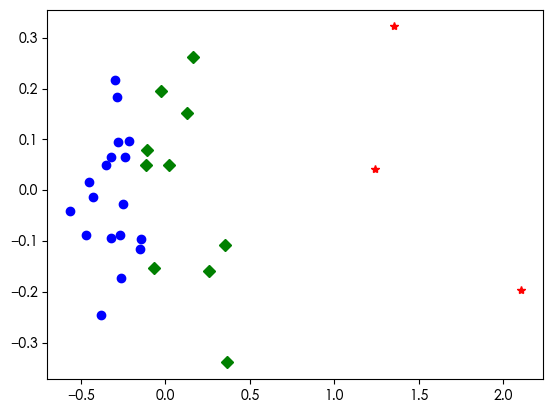

In [8]:
import warnings

warnings.filterwarnings("ignore")  # 忽略掉使用默写函数的一些警告信息

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
# 将上述数据放到 excel 里，并用 pandas 读取
df = pd.read_excel("datas/data-pca.xlsx", index_col=0)

scale_values = MinMaxScaler().fit_transform(df.values)  # 数据表转化预处理

kmeans = KMeans(n_clusters=3).fit(scale_values)  # 分为 3 类, 参数 n_init= 'auto' 设置初始聚类的运行次数
print(kmeans.labels_)  # 输出判别结果列表

# 具体输出判别结果
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i, j in enumerate(kmeans.labels_):
    if j == 0:
        cluster_1.append(df.index[i])
    elif j == 1:
        cluster_2.append(df.index[i])
    else:
        cluster_3.append(df.index[i])
print("类别1")
print(cluster_1)
print("类别2")
print(cluster_2)
print("类别3")
print(cluster_3)


# draw pictures by tsne, or pca, 利用主成分降为 2 维，并画图显示分类结果
# from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tsne = PCA(n_components=2).fit_transform(scale_values)  # tsne
df2 = pd.DataFrame(tsne)
df2["labels"] = kmeans.labels_

df_1 = df2[df2["labels"] == 0]
df_2 = df2[df2["labels"] == 1]
df_3 = df2[df2["labels"] == 2]

# 画图
plt.plot(df_1[0], df_1[1], "bo", df_2[0], df_2[1], "r*", df_3[0], df_3[1], "gD")
plt.show()

## 人工神经网络
<hr>


神经网络的目标是：找到一个能把一组输入最好地映射到其正确输出的函数。例如一个简单的分类任务，其中输入是动物的图像，正确的输出将是动物的名称。或者根据历史需求数据，预测未来一期的需求。神经网络的思想类似回归分析中经常用到的拟合，都用到了最小二乘的思想：数学意义上的决策目标是：选取一些参数（神经网络中每个输入的权重），使得拟合的输出与期望输出的误差平方和最小。

下面是一个神经网络示意图（输入层有一些神经元，隐含层有一些神经元，输出层有一些神经元），输入信息经过正向传播到输出，计算实际输出与期望输出的误差后，在反向传播误差；重复这个过程，在传播过程中，不断减少误差，直到误差减少到一定程度终止。

![ann.png](_build/html/_images/ann.png)

用 BP 神经网络预测 sklearn 包中自带的乳腺癌数据例子：

In [9]:
## 测试一下癌症数据
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

cancer = datasets.load_breast_cancer()
cancer_data = cancer["data"]
cancer_target = cancer["target"]

# 将数据集划分为训练集，测试集
(
    cancer_data_train,
    cancer_data_test,
    cancer_target_train,
    cancer_target_test,
) = train_test_split(cancer_data, cancer_target, test_size=0.2)

# 数据标准化
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)

# 建立 BP 模型
bpnn = MLPClassifier(
    hidden_layer_sizes=(20, 10),  # 神经元隐含层的大小
    max_iter=200,
    solver="adam",
    random_state=45,
)
bpnn.fit(cancer_trainStd, cancer_target_train)

# 预测
y_pred = bpnn.predict(cancer_testStd)  # 返回预测结果
print("神经网络预测结果评价报告：\n", classification_report(cancer_target_test, y_pred))

神经网络预测结果评价报告：
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        39
           1       0.95      1.00      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



其他常见的机器学习方法，例如随机森林，支持向量机，梯度提升等，都可以在`sklearn`库中找到相应的函数。

## 练习
<hr>

```{exercise}
:label: regression
使用python 中的`statsmodels`库或`sklearn`库，编程实现《统计学》或《计量经济学》课程上的一些数据分析习题。

```

<script src="https://giscus.app/client.js"
        data-repo="robinchen121/book-Python-Data-Science"
        data-repo-id="R_kgDOKFdyOw"
        data-category="Announcements"
        data-category-id="DIC_kwDOKFdyO84CgWHi"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>

<!-- Toogle google translation -->
<div id="google_translate_element"></div>
<script type="text/javascript">
      function googleTranslateElementInit() {
        new google.translate.TranslateElement({ pageLanguage: 'zh-CN',
                  includedLanguages: 'en,zh-CN,zh-TW,ja,ko,de,ru,fr,es,it,pt,hi,ar,fa',
layout: google.translate.TranslateElement.InlineLayout.SIMPLE }, 'google_translate_element');
      }
</script>
<script type="text/javascript"
      src="https://translate.google.com/translate_a/element.js?cb=googleTranslateElementInit"
></script>
<br>